# Step1 : Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.dropna(inplace= True)
df_train.isnull().sum()

x    0
y    0
dtype: int64

In [3]:
x_train = df_train['x']
y_train = df_train['y']
x_test = df_test['x']
y_test = df_test['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

# Step2 : finding the coefficients of the best fit line

Gradient Descent

In [4]:
#cost function is the average squared difference between 
def cost_fun(in1,in2,m,b):
    x = len(in1)
    total_mse = 0.0
    for i in range(x):
        total_mse += (in2[i]-((in1*m) + b))**2
    return total_mse/x

In [5]:
# to minimize mse gradient decent is used 
def grad_decent(in1,in2,m,b,lr):
    m_deriv = 0
    b_deriv = 0
    x = len(in1)
    
    for i in range(x):
        m_deriv += -2*in1[i] *(in2[i] - ((m*in1[i]) + b))
        b_deriv += -2*(in2[i] - ((m*in1[i]) + b))
        
    
    m -= (m_deriv/x)*lr
    b -= (b_deriv/x)*lr
    
    return m,b

In [66]:
def train(in1,in2,m,b,lr,itre):
    cost_hist = []
    
    for i in range(itre):
        m,b = grad_decent(in1,in2,m,b,lr)
        
        cost = cost_fun(in1,in2,m,b)
        cost_hist.append(cost)
        
    print("Done!")
    
    return m,b,cost_hist

In [67]:
m,b,c_hist = train(x_train,y_train,0,0,0.0001,700)

Done!


# Step3 : Prediction(Gradient Descent)

In [68]:
y_pred = b+m*x_test

# Step4: checking the goodness of the model(Gradient Descent)

In [69]:
# calculating the R-Square
mean_y_test = sum(y_test)/len(y_test)

r1 = sum((y_test - mean_y_test)**2)
r2 = sum((y_pred - mean_y_test)**2)

r_sq = r2/r1

print("R2 Score:",r_sq)


R2 Score: [0.95934092]


# Step5 : Visualization(Gradient Descent)

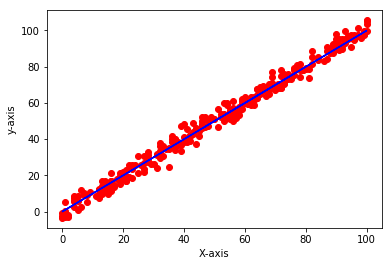

In [70]:
plt.scatter(x_test, y_test,color='r')
plt.plot(x_test,y_pred,color='b')
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.show()

# Step2 : finding the coefficients of the best fit line(Ordinary least square method)

In [71]:
# Ordinary Least square method 
# Mean X and Y
mean_x = np.mean(x_train)
mean_y = np.mean(y_train)

# Total number of values
m = len(x_train)

# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (x_train[i] - mean_x) * (y_train[i] - mean_y)
    denom += (x_train[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Print coefficients
print(b1, b0)

[1.00065638] [-0.10726546]


# Step3 : Prediction(OLS)

In [73]:
y_pr = b0+b1*x_test

# Step4: checking the goodness of the model(OLS)

In [74]:
# calculating the R-Square
mean_y_test = sum(y_test)/len(y_test)

r1 = sum((y_test - mean_y_test)**2)
r2 = sum((y_pr - mean_y_test)**2)

r_sq = r2/r1

print("R2 Score:",r_sq)

R2 Score: [0.96276141]


# Step5 : Visualization(OLS)

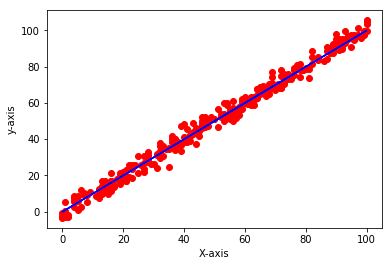

In [75]:
plt.scatter(x_test, y_test,color='r')
plt.plot(x_test,y_pr,color='b')
plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.show()